In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Visualize the dataset

Target labels:  [3 4 1 8 9 2 5 0 6 4]


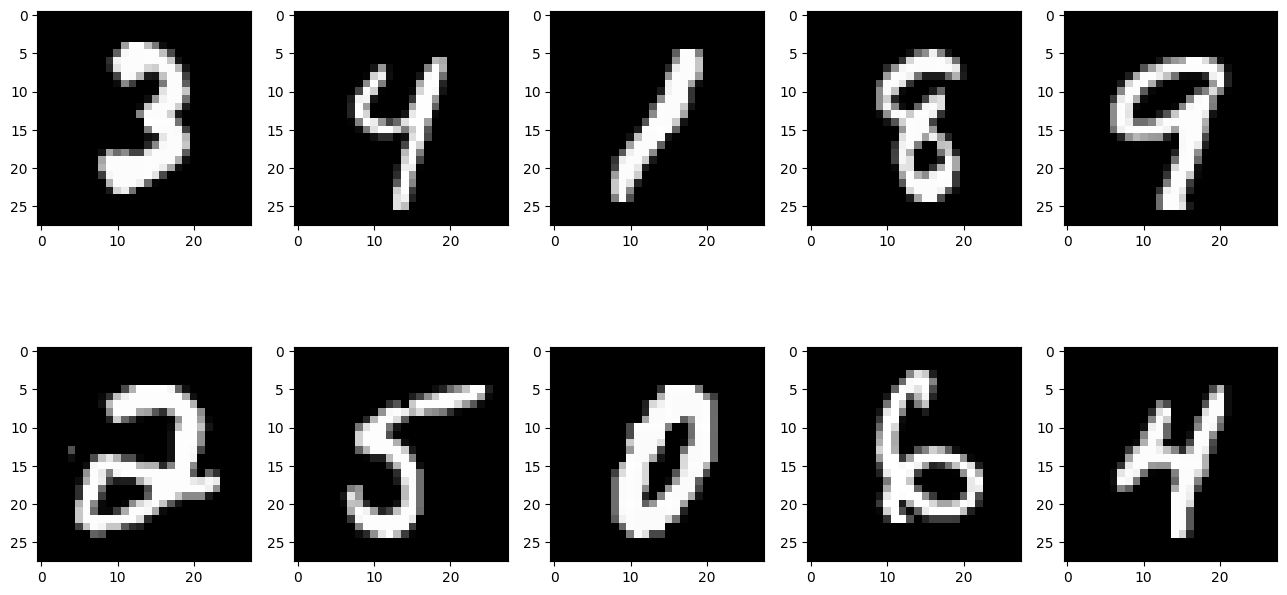

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [10]:
# model=Sequential()

# model.add(Flatten(input_shape=(28,28)))

# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,input_dim=64,activation='relu'))
# model.add(Dense(32,input_dim=64,activation='relu'))
# model.add(Dense(10,input_dim=32,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras import regularizers
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [12]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9263 - accuracy: 0.8822
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6084 - accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5433 - accuracy: 0.9277
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4992 - accuracy: 0.9334
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.9377
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.9382
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4293 - accuracy: 0.9413
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.9419
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4014 - accuracy: 0.9441
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.395

Plot the loss and accuracy graphs

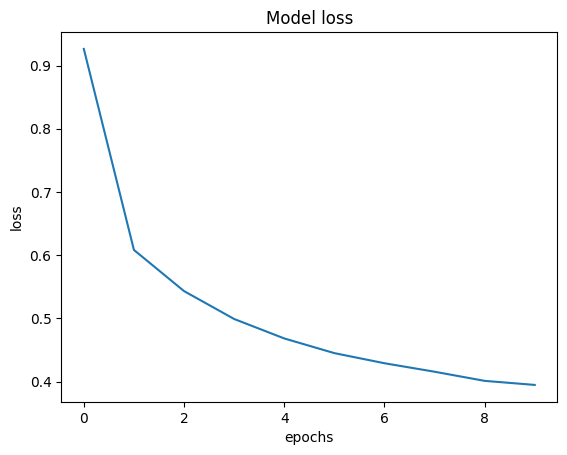

In [13]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

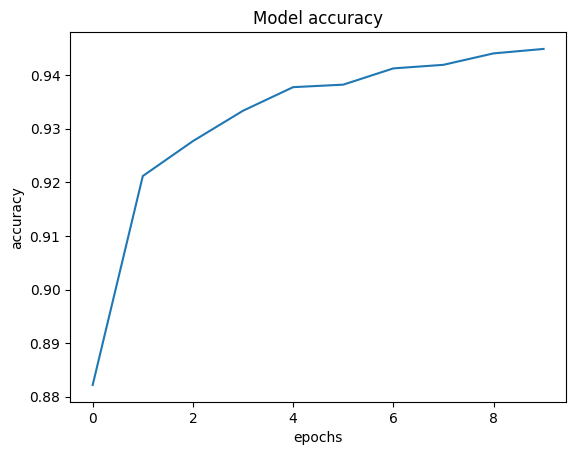

In [14]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [15]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.9501
Loss of the Test dataset is: 0.37381550669670105
Accuracy of the test dataset is: 0.9501000046730042


Save the model weights

In [17]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 0s 939us/step


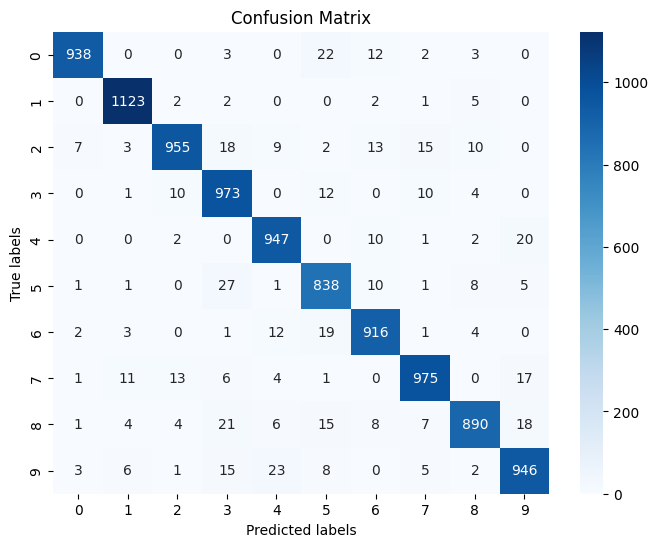

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# After evaluating the model on the test data
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
